<a href="https://colab.research.google.com/github/batwhite/Data-Science-Project/blob/master/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
!git clone https://github.com/batwhite/Data-Science-Project.git

Cloning into 'Data-Science-Project'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 20 (delta 3), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

#for matplotlib


%matplotlib inline



In [ ]:
path_transaction = "/content/Data-Science-Project/Data/QVI_transaction_data.xlsx"
path_trends = "/content/Data-Science-Project/Data/QVI_purchase_behaviour.csv"
trends_data = pd.read_csv(path_trends)
trends_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


<Figure size 432x288 with 0 Axes>

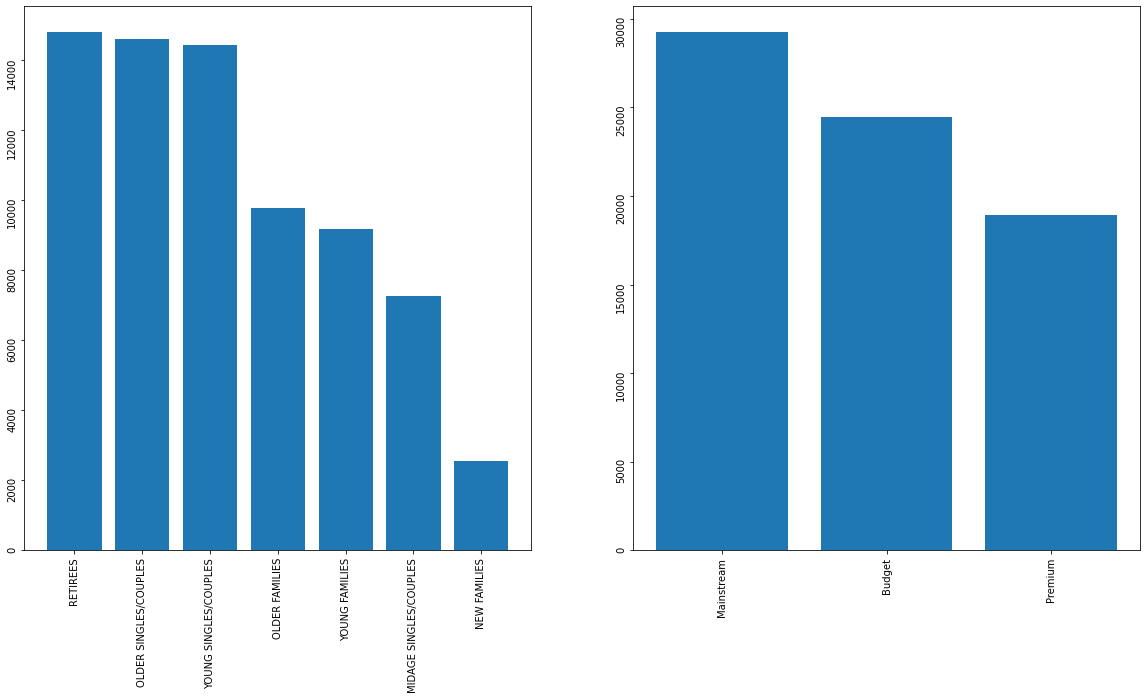

In [ ]:
categorical_lifestage = pd.Categorical(trends_data.LIFESTAGE)
categorical_lifestage.describe()
plt.figure()

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,10))

ax[0].bar(trends_data.LIFESTAGE.value_counts().index,trends_data.LIFESTAGE.value_counts()) 
ax[0].tick_params(labelrotation=90)
ax[1].bar(trends_data.PREMIUM_CUSTOMER.value_counts().index,trends_data.PREMIUM_CUSTOMER.value_counts())
ax[1].tick_params(labelrotation = 90)
plt.show()


# trends_data.LIFESTAGE[categorical_lifestage[1]]


In [ ]:
transaction_data = pd.read_excel(path_transaction, engine = 'openpyxl')
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
#checking whether there are any empty values
trends_data.isnull().sum().sum()
transaction_data.isnull().sum().sum()

0

In [ ]:
merged_data = pd.merge(transaction_data,trends_data, how = "right",on = "LYLTY_CARD_NBR")
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43359,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,43531,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,43532,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,43406,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream


In [ ]:
#checking that all the customers have transaction records
merged_data.isnull().sum().sum()


#gettinig all the names of the products
unique_prod = merged_data["PROD_NAME"].unique()
unique_prod

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [ ]:
#to identify all the outliers 
print(merged_data.sort_values(['TOT_SALES'],ascending = False))
merged_data = merged_data[merged_data["PROD_QTY"]<6]



         DATE  STORE_NBR  ...               LIFESTAGE  PREMIUM_CUSTOMER
221625  43331        226  ...          OLDER FAMILIES           Premium
221626  43605        226  ...          OLDER FAMILIES           Premium
39548   43605         44  ...          YOUNG FAMILIES            Budget
187012  43599        190  ...          OLDER FAMILIES        Mainstream
118381  43605        118  ...                RETIREES        Mainstream
...       ...        ...  ...                     ...               ...
101416  43492        103  ...   YOUNG SINGLES/COUPLES            Budget
184172  43644        185  ...   YOUNG SINGLES/COUPLES           Premium
258273  43429        265  ...  MIDAGE SINGLES/COUPLES           Premium
16905   43616         20  ...   YOUNG SINGLES/COUPLES           Premium
42708   43332         48  ...                RETIREES        Mainstream

[264836 rows x 10 columns]


In [ ]:
split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()
split_prods

0                    [Natural, Chip, Compny, SeaSalt]
1             [Red, Rock, Deli, Chikn, Garlic, Aioli]
2                 [Grain, Waves, Sour, Cream, Chives]
3                 [Natural, ChipCo, Hony, Soy, Chckn]
4                      [WW, Original, Stacked, Chips]
                             ...                     
264831                  [Grain, Waves, Sweet, Chilli]
264832           [Kettle, Tortilla, ChpsFeta, Garlic]
264833            [Tyrrells, Crisps, Lightly, Salted]
264834    [Old, El, Paso, Salsa, Dip, Chnky, Tom, Ht]
264835        [Smiths, Crinkle, Chips, Salt, Vinegar]
Name: PROD_NAME, Length: 264834, dtype: object

In [ ]:
#changing date time format
from datetime import date, timedelta
start = date(1899,12,30)

merged_data["DATE"] = merged_data["DATE"].apply(lambda x: (timedelta(x)+start).strftime("%x"))
# merged_data["DATE"] = merged_data["DATE"].apply(lambda x: x.strftime("%x"))
# print(pd.to_datetime(merged_data["DATE"]))
merged_data["DATE"] = pd.to_datetime(merged_data["DATE"])
merged_data["DATE"]



0        2018-10-17
1        2018-09-16
2        2019-03-07
3        2019-03-08
4        2018-11-02
            ...    
264831   2018-12-08
264832   2018-10-01
264833   2018-10-24
264834   2018-10-27
264835   2018-12-14
Name: DATE, Length: 264834, dtype: datetime64[ns]

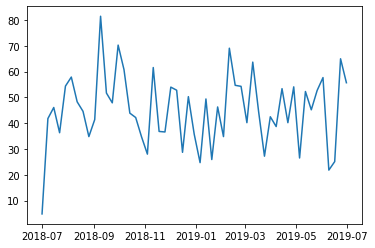

In [ ]:
# merged_data.sort_values(['DATE'])
# mer = merged_data.groupby(["PREMIUM_CUSTOMER"])
# merged_data["DATE"].index.dtype
group = merged_data.groupby(["STORE_NBR",pd.Grouper(key = "DATE", freq = "1W")]).TOT_SALES.sum()
weekly_sales_data = group.unstack()
plt.plot(weekly_sales_data.loc[1])


# merged_data["DATE"].map(type) == type(merged_data["DATE"][0])
# merged_data.groupby("STORE_NBR").head()

In [ ]:
weekly_sales_data

DATE,2018-07-01,2018-07-08,2018-07-15,2018-07-22,2018-07-29,2018-08-05,2018-08-12,2018-08-19,2018-08-26,2018-09-02,2018-09-09,2018-09-16,2018-09-23,2018-09-30,2018-10-07,2018-10-14,2018-10-21,2018-10-28,2018-11-04,2018-11-11,2018-11-18,2018-11-25,2018-12-02,2018-12-09,2018-12-16,2018-12-23,2018-12-30,2019-01-06,2019-01-13,2019-01-20,2019-01-27,2019-02-03,2019-02-10,2019-02-17,2019-02-24,2019-03-03,2019-03-10,2019-03-17,2019-03-24,2019-03-31,2019-04-07,2019-04-14,2019-04-21,2019-04-28,2019-05-05,2019-05-12,2019-05-19,2019-05-26,2019-06-02,2019-06-09,2019-06-16,2019-06-23,2019-06-30
STORE_NBR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.8,41.8,46.1,36.3,54.4,57.9,48.3,44.60,34.80,41.4,81.5,51.7,47.9,70.3,60.8,43.9,42.2,34.7,28.0,61.6,36.8,36.6,54.0,52.8,28.7,50.3,35.7,24.7,49.4,25.9,46.3,34.8,69.1,54.7,54.3,40.2,63.7,44.5,27.2,42.5,38.7,53.4,40.2,54.1,26.5,52.3,45.20,52.7,57.7,21.8,25.1,65.0,55.7
2,12.1,56.6,28.2,18.2,26.1,55.4,20.0,58.90,39.10,40.2,26.5,29.7,33.2,54.8,52.9,27.7,24.6,49.8,47.8,36.4,54.2,30.5,12.7,20.2,33.0,35.5,38.7,19.8,56.6,52.8,11.8,44.6,37.7,33.8,35.2,16.4,59.1,13.1,53.5,62.6,52.0,52.3,45.8,36.2,31.3,57.8,39.20,40.5,53.3,26.8,45.1,22.0,43.5
3,7.4,368.8,236.2,226.4,301.3,261.6,167.7,280.15,264.00,263.8,280.4,246.1,196.4,206.7,236.6,274.7,217.8,250.0,219.6,232.5,279.8,185.7,200.4,205.5,207.2,280.5,352.4,196.3,316.0,231.6,205.4,239.9,280.0,321.1,306.0,279.8,333.2,246.8,202.5,240.0,224.2,219.5,136.6,267.5,190.6,315.0,197.30,279.4,157.4,165.8,217.3,243.2,340.4
4,43.1,376.2,233.4,315.8,358.0,380.4,295.4,159.40,268.30,298.4,359.4,244.8,239.0,286.4,352.8,322.0,262.6,274.6,346.2,204.6,312.0,276.0,275.6,246.2,287.8,265.0,271.0,396.0,323.0,353.6,321.2,258.6,202.8,187.0,263.4,256.4,310.8,281.6,302.6,191.4,339.2,244.8,301.0,310.3,179.0,310.4,211.15,225.0,169.4,322.6,289.6,269.4,273.0
5,15.2,208.8,175.4,151.6,225.2,141.8,175.2,118.40,196.50,226.6,236.6,178.2,216.2,187.4,178.4,200.8,143.6,191.8,148.2,210.8,173.0,203.6,201.0,230.0,146.6,216.4,171.0,186.8,186.8,196.0,171.6,212.0,194.8,161.8,208.8,144.6,198.8,148.6,104.0,165.2,185.6,128.8,194.8,165.2,190.0,185.4,118.40,128.9,239.8,210.2,176.2,208.0,221.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,5.4,69.9,30.8,50.2,37.6,82.0,55.0,163.75,22.90,34.2,46.5,62.4,25.7,34.7,60.4,47.6,54.7,47.8,46.4,36.8,66.8,73.2,37.4,20.7,52.2,76.8,37.0,50.6,23.9,68.6,21.5,50.5,39.1,30.8,31.2,27.6,26.4,71.7,44.0,74.3,52.7,48.2,25.7,45.5,54.2,27.1,51.00,75.8,66.0,63.9,32.6,44.2,75.1
269,18.6,268.0,168.6,301.6,210.6,169.0,218.8,196.50,159.60,144.8,180.2,245.4,223.4,198.0,296.2,214.0,264.8,244.4,273.2,220.2,198.4,225.8,194.2,130.8,172.6,242.0,269.8,235.8,186.2,243.2,244.0,213.0,234.6,268.8,200.2,199.4,212.8,214.0,217.0,147.0,226.2,243.0,259.4,217.2,257.6,162.0,187.90,224.6,219.8,209.8,150.2,222.6,176.0
270,73.8,163.8,216.6,225.2,188.6,285.0,300.6,145.85,213.50,234.2,219.0,177.4,183.4,185.0,157.6,153.0,208.2,205.2,224.6,204.8,238.2,224.0,225.6,218.8,181.6,302.8,239.4,201.4,209.0,285.6,282.2,235.4,224.0,232.8,183.6,184.2,227.0,254.8,177.0,264.8,213.6,189.8,232.6,214.0,196.6,176.0,208.60,245.6,204.8,221.6,177.2,259.0,197.0


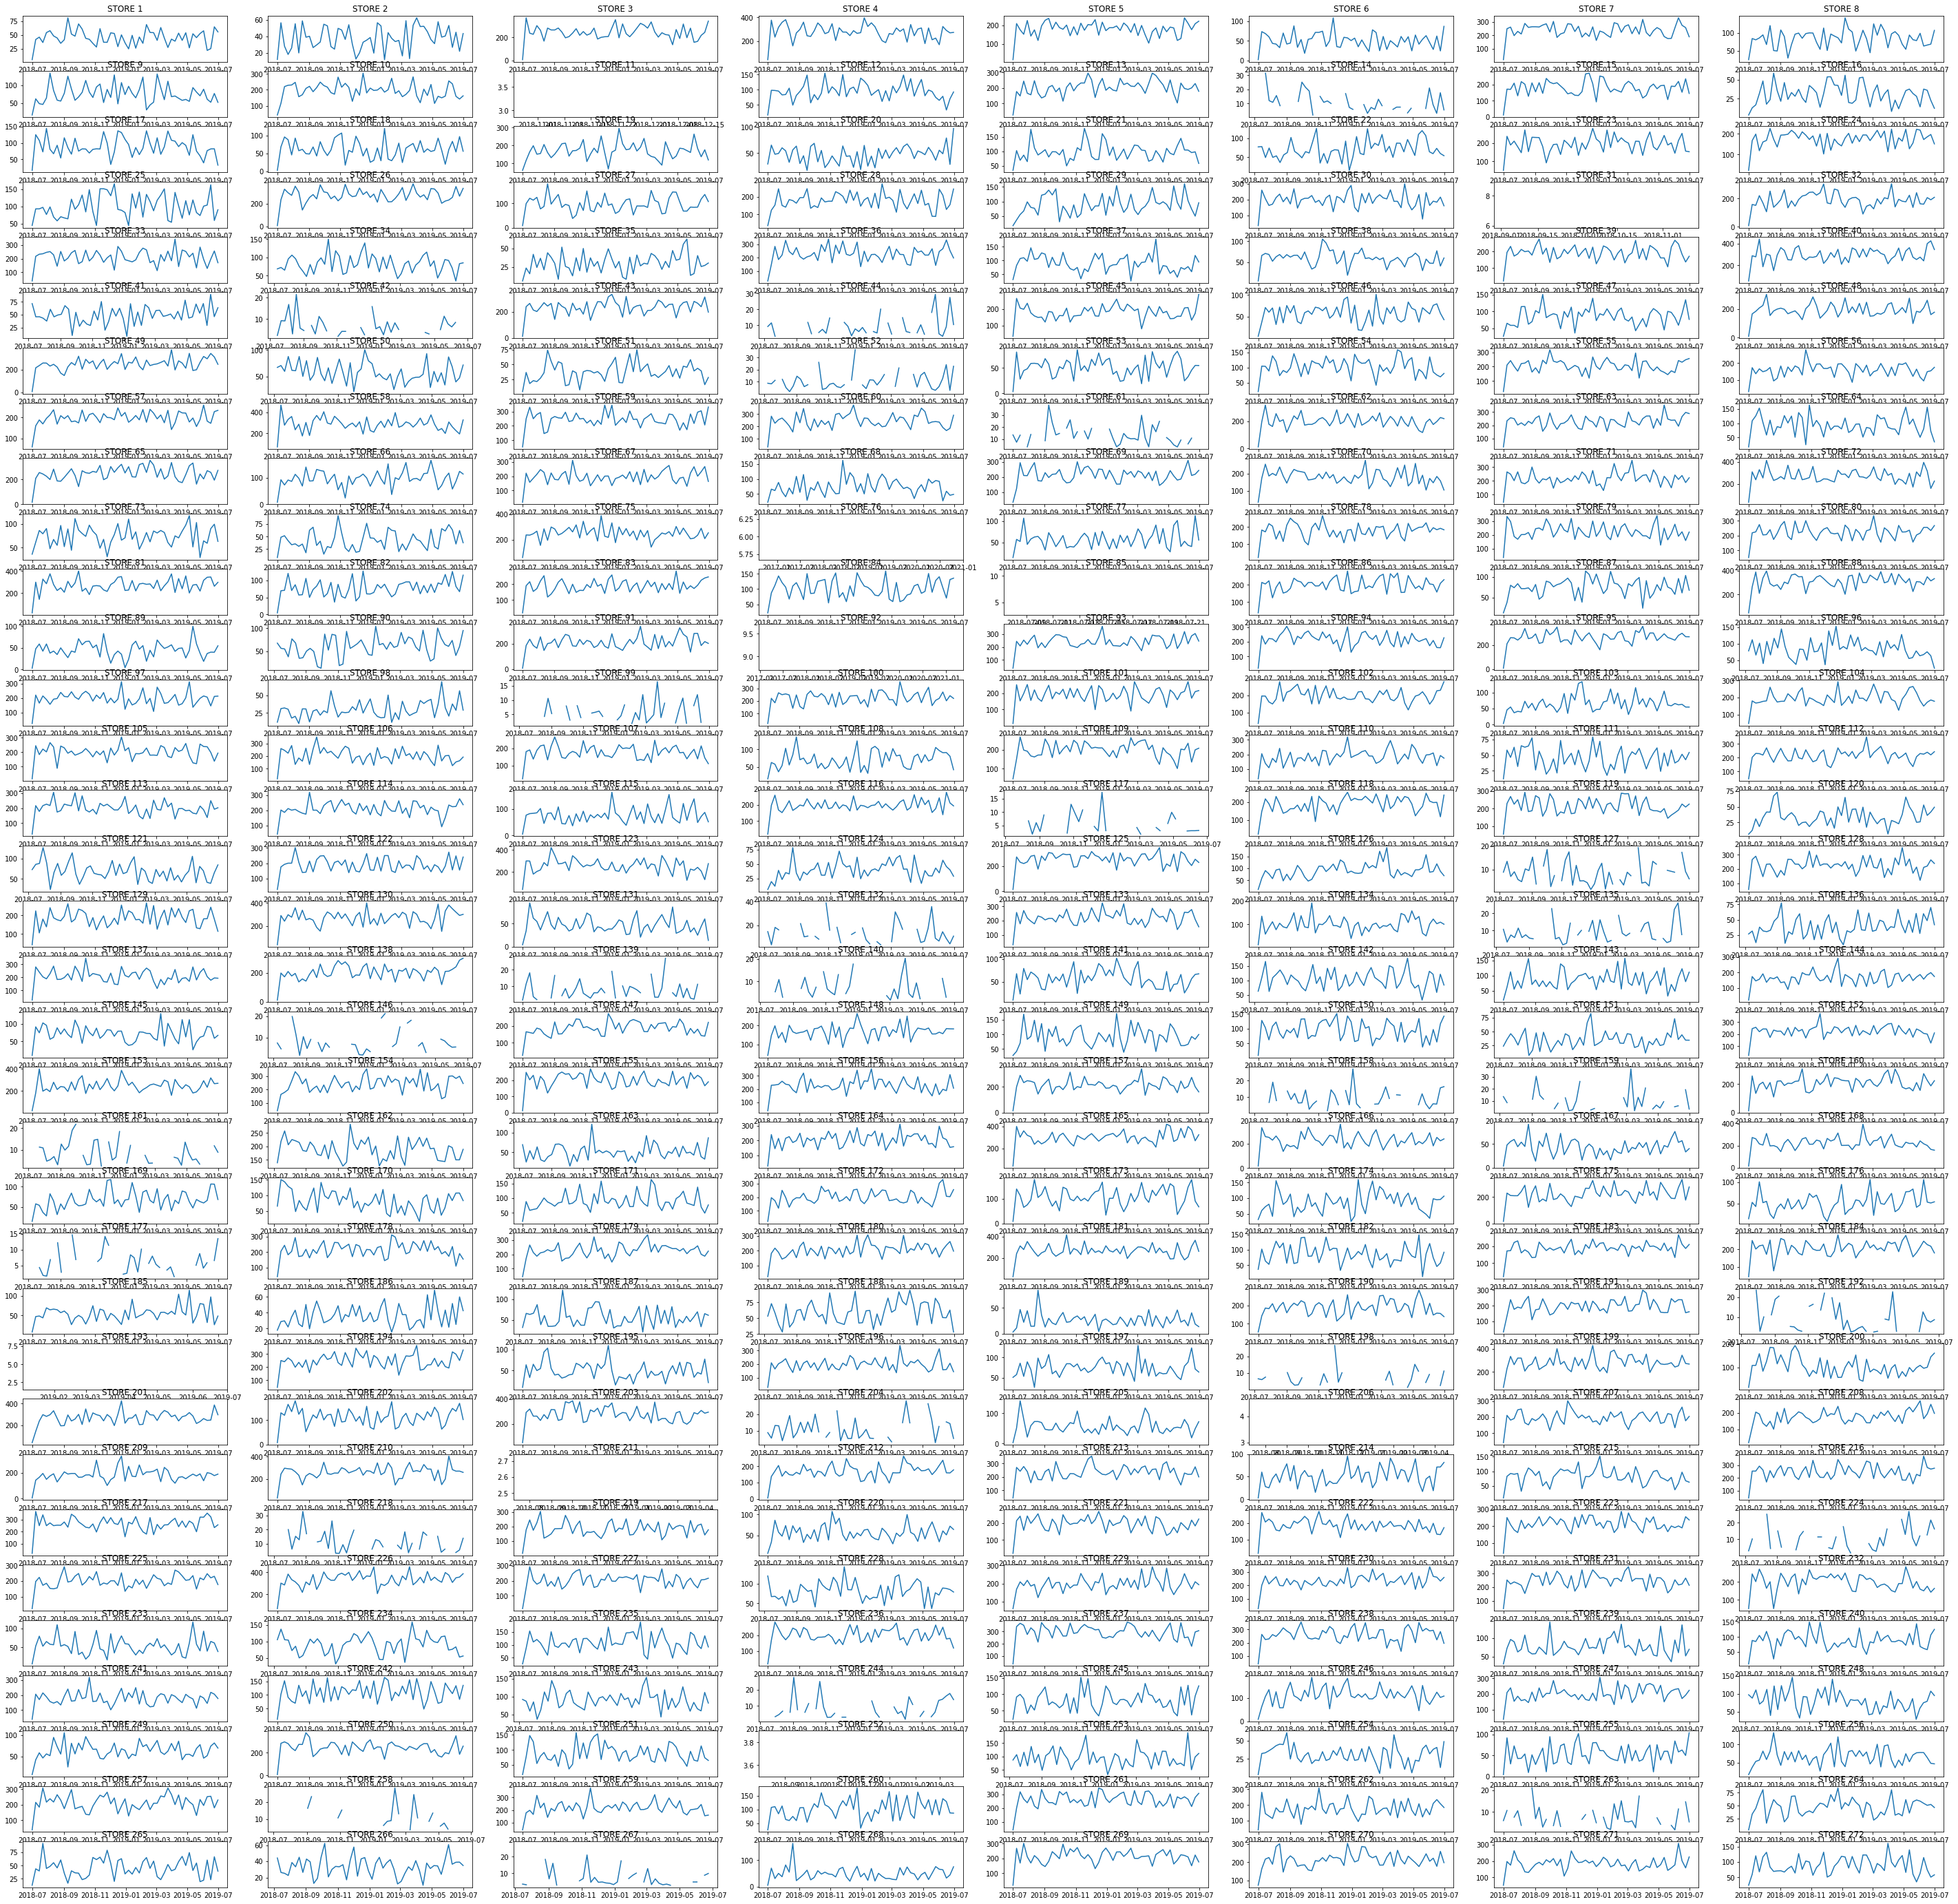

In [ ]:
#printing different sales data weekly
fig, ax = plt.subplots(34,8,figsize = (50,50),squeeze=False,)
it = iter(weekly_sales_data.index)
for i in range(34):
  for j in range(8):
    k = next(it)
    _ = ax[i][j].plot(weekly_sales_data.loc[k])
    _ = ax[i][j].set_title("STORE "+str(k)) 
plt.show()


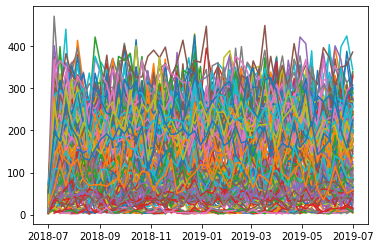

In [ ]:
for i in weekly_sales_data.index:
  plt.plot(weekly_sales_data.loc[i])

In [ ]:
merged_data.head(6)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream
5,2018-12-28,1,1005,6,86,Cheetos Puffs 165g,1,2.8,MIDAGE SINGLES/COUPLES,Mainstream


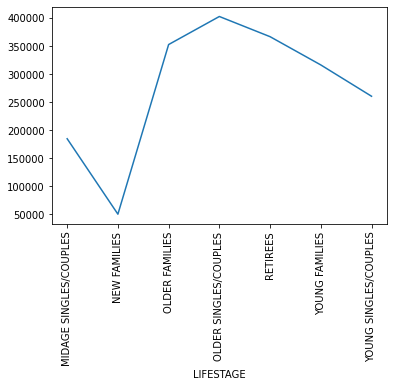

In [ ]:
#sales wrt different customers
merged_data.groupby(['LIFESTAGE']).TOT_SALES.sum().plot(rot = 90)

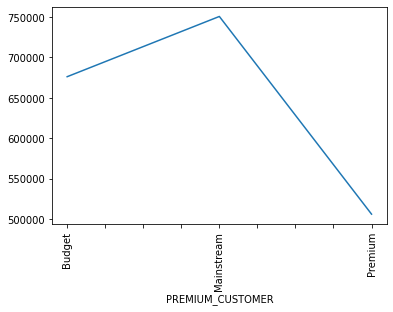

In [ ]:
#sales wrt the premium customer
merged_data.groupby(["PREMIUM_CUSTOMER"]).TOT_SALES.sum().plot(rot = 90)

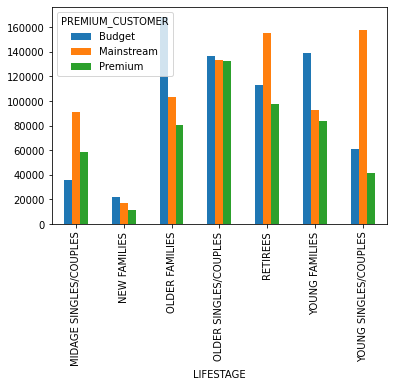

In [ ]:
#how many categories are within each customer
aa = merged_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).TOT_SALES.sum()
aa.unstack().plot.bar()
